In [1]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import ticker

from inference.gp_tools import GpRegressor
from inference.gp_tools import RationalQuadratic, SquaredExponential

from process_T_phi_data import data

def scientificNotation(value):
    if value == 0:
        return '0'
    else:
        e = np.log10(np.abs(value))
        m = np.sign(value) * 10 ** (e - int(e))
        return r'${:.0f} \times 10^{{{:d}}}$'.format(m, int(e))

In [2]:
# Train the GP on the data
# with inference-tools
time = 3600

points2 = []
inv, surface_flux, max_ib, x_max_ib, mean_ib, total_bubbles = [], [], [], [], [], []
for d in data:
    points2.append([d["T"], np.log10(d["flux"])])
    inv.append(np.log10(d["inventory_interp"](time)))
    surface_flux.append(np.log10(-d["surface_flux_interp"](time)))
    max_ib.append(np.log10(d["max_ib_interp"](time)))
    x_max_ib.append(d["x_max_ib_interp"](time))
    mean_ib.append(np.log10(d["mean_ib_interp"](time)))
    total_bubbles.append(np.log10(d["total_bubbles_interp"](time)))
points2 = np.array(points2)


N = 100
gp_x = np.linspace(100, 1200, N)
gp_y = np.log10(np.logspace(17+np.log10(1), 21+np.log10(5), N))

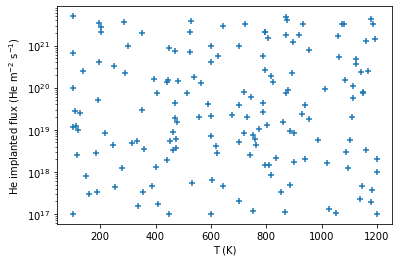

In [3]:
plt.scatter(points2[:, 0], 10**points2[:, 1], marker="+")
plt.yscale("log")
plt.xlabel("T (K)")
plt.ylabel(r"He implanted flux (He m$^{-2}$ s$^{-1}$)")
plt.savefig("Figures/points.svg")
plt.savefig("Figures/points.pdf")
plt.show()

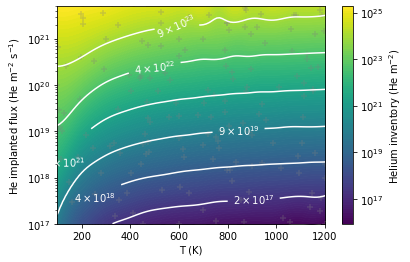

In [4]:
# inventory
GP = GpRegressor(points2, inv, kernel=RationalQuadratic)


gp_coords = [(i, j) for i in gp_x for j in gp_y]
mu, sig = GP(gp_coords)

fig = plt.figure()
locator = ticker.LogLocator(base=10)
levels = np.logspace(
    min(mu),
    max(mu),
    100)
levels2 = np.logspace(
    min(mu),
    max(mu),
    8)


CS = plt.contourf(*np.meshgrid(gp_x, 10**gp_y), 10**mu.reshape([N, N]).T, locator=locator, levels=levels)
plt.colorbar(CS, label=r"Helium inventory (He m$^{-2}$)", ticks=locator)
CS2 = plt.contour(
    *np.meshgrid(gp_x, 10**gp_y), 10**mu.reshape([N, N]).T, levels=levels2,
    locator=locator, colors="white")
CLS = plt.clabel(CS2, inline=True, fontsize=10, fmt=scientificNotation)

# overplot the data points
plt.scatter(points2[:, 0], 10**points2[:, 1], color=(0.5, 0.5, 0.5), alpha=0.3, marker="+")
plt.yscale("log")
plt.xlabel("T (K)")
plt.ylabel(r"He implanted flux (He m$^{-2}$ s$^{-1}$)")
for c in CS.collections:  # for avoiding white lines in pdf
        c.set_edgecolor("face")
plt.savefig("Figures/inventory_T_phi.svg")
plt.savefig("Figures/inventory_T_phi.pdf")
plt.show()

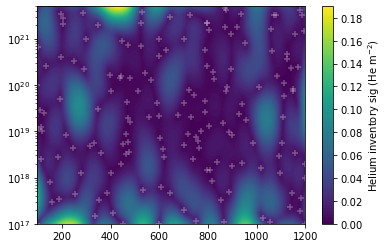

In [5]:
CS = plt.contourf(*np.meshgrid(gp_x, 10**gp_y), sig.reshape([N, N]).T, levels=100)
plt.yscale("log")
plt.scatter(points2[:, 0], 10**points2[:, 1], color='white', alpha=0.3, marker="+")
plt.colorbar(CS, label=r"Helium inventory sig (He m$^{-2}$)")
for c in CS.collections:  # for avoiding white lines in pdf
        c.set_edgecolor("face")
plt.show()

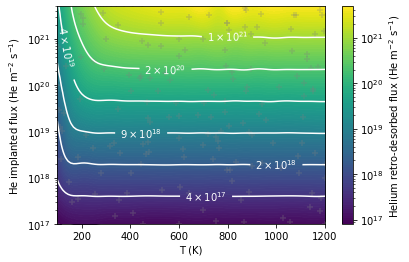

In [6]:
# surface flux
GP = GpRegressor(points2, surface_flux, kernel=RationalQuadratic)

gp_x = np.linspace(100, 1200, N)
gp_y = np.log10(np.logspace(17+np.log10(1), 21+np.log10(5), N))

gp_coords = [(i, j) for i in gp_x for j in gp_y]
mu, sig = GP(gp_coords)

fig = plt.figure()
locator = ticker.LogLocator(base=10)
levels = np.logspace(
    min(mu),
    max(mu),
    100)
levels2 = np.logspace(
    min(mu),
    max(mu),
    8)

CS = plt.contourf(*np.meshgrid(gp_x, 10**gp_y), 10**mu.reshape([N, N]).T, locator=locator, levels=levels)
plt.colorbar(CS, label=r"Helium retro-desorbed flux (He m$^{-2}$ s$^{-1}$)", ticks=locator)
CS2 = plt.contour(
    *np.meshgrid(gp_x, 10**gp_y), 10**mu.reshape([N, N]).T, levels=levels2,
    locator=locator, colors="white")
CLS = plt.clabel(CS2, inline=True, fontsize=10, fmt=scientificNotation)

# overplot the data points
plt.scatter(points2[:, 0], 10**points2[:, 1], color=(0.5, 0.5, 0.5), alpha=0.3, marker="+")
# plt.scatter(*np.meshgrid(gp_x, 10**gp_y))
plt.yscale("log")
plt.xlabel("T (K)")
plt.ylabel(r"He implanted flux (He m$^{-2}$ s$^{-1}$)")
for c in CS.collections:  # for avoiding white lines in pdf
        c.set_edgecolor("face")
plt.savefig("Figures/surface_flux_T_phi.svg")
plt.savefig("Figures/surface_flux_T_phi.pdf")
plt.show()

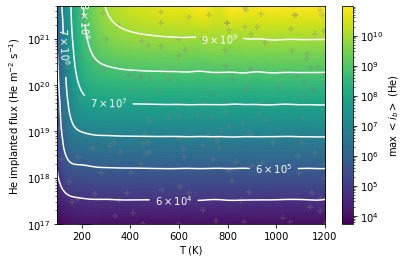

In [7]:
# max_ib
GP = GpRegressor(points2, max_ib, kernel=RationalQuadratic)


gp_coords = [(i, j) for i in gp_x for j in gp_y]
mu, sig = GP(gp_coords)

fig = plt.figure()
locator = ticker.LogLocator(base=10)
levels = np.logspace(
    min(mu),
    max(mu),
    100)
levels2 = np.logspace(
    min(mu),
    max(mu),
    8)

CS = plt.contourf(*np.meshgrid(gp_x, 10**gp_y), 10**mu.reshape([N, N]).T, locator=locator, levels=levels)
plt.colorbar(CS, label=r"max $<i_b>$ (He)", ticks=locator)
CS2 = plt.contour(
    *np.meshgrid(gp_x, 10**gp_y), 10**mu.reshape([N, N]).T, levels=levels2,
    locator=locator, colors="white")
CLS = plt.clabel(CS2, inline=True, fontsize=10, fmt=scientificNotation)

# overplot the data points
plt.scatter(points2[:, 0], 10**points2[:, 1], color=(0.5, 0.5, 0.5), alpha=0.3, marker="+")
plt.yscale("log")
plt.xlabel("T (K)")
plt.ylabel(r"He implanted flux (He m$^{-2}$ s$^{-1}$)")
for c in CS.collections:  # for avoiding white lines in pdf
        c.set_edgecolor("face")
plt.savefig("Figures/max_ib_T_phi.svg")
plt.savefig("Figures/max_ib_T_phi.pdf")
plt.show()

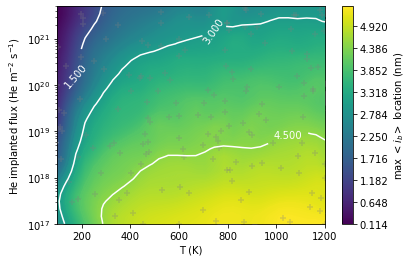

In [8]:
# x max_ib
x_max_ib_scaled = np.array(x_max_ib)*1e9
GP = GpRegressor(points2, x_max_ib_scaled, kernel=RationalQuadratic)
N2 = 30
gp_x2 = np.linspace(100, 1200, N2)
gp_y2 = np.log10(np.logspace(17+np.log10(1), 21+np.log10(5), N2))

gp_coords = [(i, j) for i in gp_x2 for j in gp_y2]
mu, sig = GP(gp_coords)

fig = plt.figure()


CS = plt.contourf(*np.meshgrid(gp_x2, 10**gp_y2), mu.reshape([N2, N2]).T, levels=1000)
plt.colorbar(CS, label=r"max $<i_b>$ location (nm)")
CS2 = plt.contour(
    *np.meshgrid(gp_x2, 10**gp_y2), mu.reshape([N2, N2]).T, levels=4,
     colors="white")
CLS = plt.clabel(CS2, inline=True, fontsize=10)

# overplot the data points
plt.scatter(points2[:, 0], 10**points2[:, 1], color=(0.5, 0.5, 0.5), alpha=0.3, marker="+")
plt.yscale("log")
plt.xlabel("T (K)")
plt.ylabel(r"He implanted flux (He m$^{-2}$ s$^{-1}$)")
for c in CS.collections:  # for avoiding white lines in pdf
        c.set_edgecolor("face")
plt.savefig("Figures/x_max_ib_T_phi.svg")
plt.savefig("Figures/x_max_ib_T_phi.pdf")
plt.show()

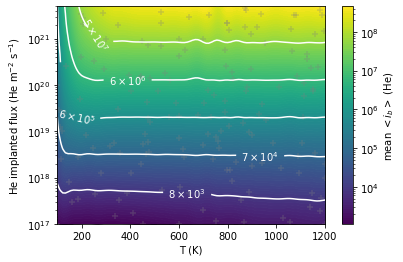

In [9]:
# mean_ib
GP = GpRegressor(points2, mean_ib, kernel=RationalQuadratic)


gp_coords = [(i, j) for i in gp_x for j in gp_y]
mu, sig = GP(gp_coords)

fig = plt.figure()
locator = ticker.LogLocator(base=10)
levels = np.logspace(
    min(mu),
    max(mu),
    100)
levels2 = np.logspace(
    2,
    max(mu),
    8)

CS = plt.contourf(*np.meshgrid(gp_x, 10**gp_y), 10**mu.reshape([N, N]).T, locator=locator, levels=levels)
plt.colorbar(CS, label=r"mean $<i_b>$ (He)", ticks=locator)
CS2 = plt.contour(
    *np.meshgrid(gp_x, 10**gp_y), 10**mu.reshape([N, N]).T, levels=levels2,
    locator=locator, colors="white")
CLS = plt.clabel(CS2, inline=True, fontsize=10, fmt=scientificNotation)

# overplot the data points
plt.scatter(points2[:, 0], 10**points2[:, 1], color=(0.5, 0.5, 0.5), alpha=0.3, marker="+")
plt.yscale("log")
plt.xlabel("T (K)")
plt.ylabel(r"He implanted flux (He m$^{-2}$ s$^{-1}$)")
for c in CS.collections:  # for avoiding white lines in pdf
        c.set_edgecolor("face")
plt.savefig("Figures/mean_ib_T_phi.svg")
plt.savefig("Figures/mean_ib_T_phi.pdf")
plt.show()

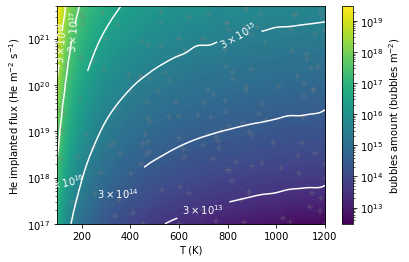

In [10]:
# total_bubbles
GP = GpRegressor(points2, total_bubbles, kernel=RationalQuadratic)

gp_coords = [(i, j) for i in gp_x for j in gp_y]
mu, sig = GP(gp_coords)

fig = plt.figure()
locator = ticker.LogLocator(base=10)
levels = np.logspace(
    min(mu),
    max(mu),
    100)
levels2 = np.logspace(
    min(mu),
    max(mu),
    8)

CS = plt.contourf(*np.meshgrid(gp_x, 10**gp_y), 10**mu.reshape([N, N]).T, locator=locator, levels=levels)
plt.colorbar(CS, label=r"bubbles amount (bubbles m$^{-2}$)", ticks=locator)
CS2 = plt.contour(
    *np.meshgrid(gp_x, 10**gp_y), 10**mu.reshape([N, N]).T, levels=levels2,
    locator=locator, colors="white")
CLS = plt.clabel(CS2, inline=True, fontsize=10, fmt=scientificNotation)

# overplot the data points
plt.scatter(points2[:, 0], 10**points2[:, 1], color=(0.5, 0.5, 0.5), alpha=0.3, marker="+")
plt.yscale("log")
plt.xlabel("T (K)")
plt.ylabel(r"He implanted flux (He m$^{-2}$ s$^{-1}$)")
for c in CS.collections:  # for avoiding white lines in pdf
        c.set_edgecolor("face")
plt.savefig("Figures/bubbles_total_T_phi.svg")
plt.savefig("Figures/bubbles_total_T_phi.pdf")
plt.show()

mu_bubble_ammount = mu